<a href="https://colab.research.google.com/github/helghand1/MAT421/blob/main/Module_G_Simpson's_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hussein ElGhandour

## MAT 421

## Module G: Simpson's Rule

## Simpson's Rule

### Introduction

Simpson’s Rule is a powerful numerical integration method that approximates the area under a curve by fitting quadratic polynomials to segments of the function. Unlike the trapezoidal rule, which uses linear approximations, Simpson’s Rule leverages parabolic curves to improve accuracy. This method is particularly effective when the function being integrated is smooth and continuous.

The method is derived using Lagrange polynomials, which construct a quadratic polynomial that passes through three consecutive points on the curve. By integrating this polynomial exactly, we obtain the Simpson’s Rule formula:

$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + 4\sum_{\text{odd}}f(x_i) + 2\sum_{\text{even}}f(x_i) + f(x_n) \right]
$$

Here, $h=\frac{b−a}{n−1}​$ represents the step size, and nn is the total number of points, which must be odd to ensure an even number of intervals. This requirement is critical since Simpson’s Rule computes integrals over pairs of subintervals.

One of the key strengths of Simpson’s Rule is its improved accuracy. While the trapezoidal rule has an error term proportional to $O(h3)$, Simpson’s Rule achieves $O(h5)$ accuracy for individual segments and $O(h4)$ accuracy across the entire interval. This makes it significantly more precise when applied to smooth functions.

<br>

### Python Implementation

This Python implementation of Simpson's Rule calculates the approximate integral of a given function using both a manual approach and SciPy's built-in simps() function for comparison. The function $f(x)=sin⁡(x)$ is defined, and 11 equally spaced points are generated over the interval $[0,\pi]$. The manual implementation follows Simpson's Rule by computing the weighted sum of function values at specified points. The results from both methods are displayed along with a visual plot to illustrate the function and the integrated area.

Manual Simpson's Rule Result: 2.0001095173150043
SciPy Simpson's Rule Result: 2.0001095173150043
Error (Manual vs SciPy): 0.00000e+00


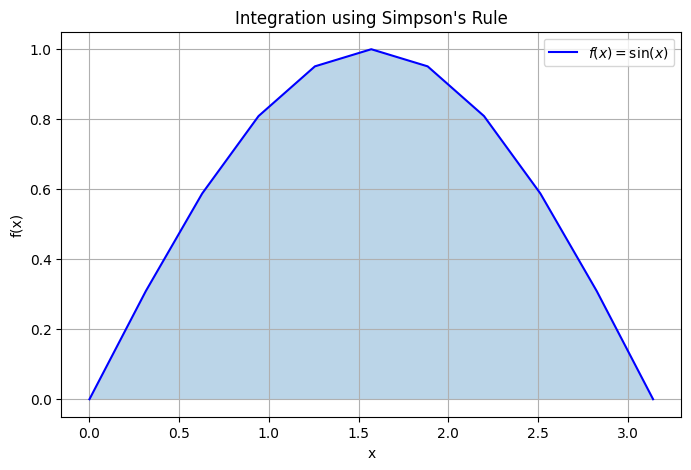

In [5]:
import numpy as np
from scipy.integrate import simpson
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return np.sin(x)

# Integration interval and number of points
a = 0         # Lower limit
b = np.pi     # Upper limit
n = 11        # Number of points (must be odd for Simpson's Rule)
h = (b - a) / (n - 1)  # Step size

# Generate x values and corresponding y values
x = np.linspace(a, b, n)
y = f(x)

# Manual implementation of Simpson's Rule
I_simp = (h / 3) * (y[0] + 4 * sum(y[1:n-1:2]) + 2 * sum(y[2:n-2:2]) + y[n-1])

# SciPy's implementation for verification
I_scipy = simpson(y, dx=h)

# Display results
print(f"Manual Simpson's Rule Result: {I_simp}")
print(f"SciPy Simpson's Rule Result: {I_scipy}")
print(f"Error (Manual vs SciPy): {abs(I_simp - I_scipy):.5e}")

# Visualization
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', label='$f(x) = \sin(x)$')
plt.fill_between(x, y, alpha=0.3)
plt.title("Integration using Simpson's Rule")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()